In [32]:

import pandas as pd
import numpy as np
import random as random
from scipy.stats import shapiro ,norm 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
df2 = pd.read_csv('cond.csv', names = [ 'Time', 'NormalTemp1', 'NormalTemp2','Average1','PaintedTemp1','PaintedTemp2','Average2','SE1','SE2']) #STDEV(B1:B10)/SQRT(COUNT(B1:B10)) 
df2

,Time,NormalTemp1,NormalTemp2,Average1,PaintedTemp1,PaintedTemp2,Average2,SE1,SE2
0,30,86.0,88.0,87.00,85.0,84.0,84.50,1.00,0.50
1,60,84.5,86.0,85.25,84.0,82.0,83.00,0.75,1.00
2,90,83.5,85.0,84.25,83.0,81.0,82.00,0.75,1.00
3,120,82.5,84.0,83.25,81.0,80.0,80.50,0.75,0.50
4,150,81.5,83.0,82.25,80.0,78.5,79.25,0.75,0.75
5,180,80.0,81.5,80.75,79.0,77.0,78.00,0.75,1.00
6,210,79.0,80.5,79.75,77.0,76.0,76.50,0.75,0.50
7,240,78.0,79.5,78.75,76.0,75.0,75.50,0.75,0.50
8,270,77.0,78.5,77.75,75.5,74.0,74.75,0.75,0.75
9,300,76.0,77.5,76.75,74.5,73.0,73.75,0.75,0.75


In [54]:
# normality test
stat, p = shapiro(df2.NormalTemp1)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.944, p=0.164


# Since the p value is greater than 0.05 , we can say that the given distribution is  normal. 

In [49]:
f = df2.NormalTemp1
sd =f.std()
mu = f.mean()
a ,b = mu-3*sd, mu+3*sd
x = np.linspace(a,b,1000)
y = norm.pdf(x, loc = mu, scale = sd)

(array([0.06546645, 0.06546645, 0.04909984, 0.01636661, 0.04909984,
        0.03273322, 0.03273322, 0.03273322, 0.04909984, 0.03273322]),
 array([62.5 , 64.85, 67.2 , 69.55, 71.9 , 74.25, 76.6 , 78.95, 81.3 ,
        83.65, 86.  ]),
 <a list of 10 Patch objects>)

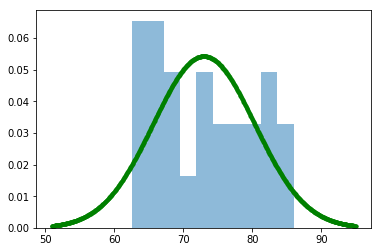

In [50]:


plt.plot(x,y,'.g')

plt.hist(f,alpha=.5, density = True) 

In [ ]:
## QQ plot

In [52]:
import statsmodels.api as sm 
import pylab as py 

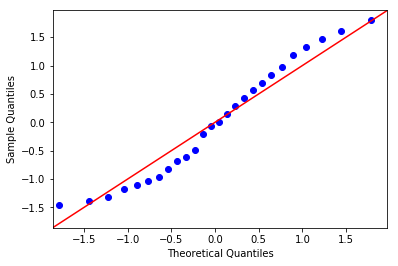

In [53]:
sm.qqplot(f, fit= True, line = "45") 
py.show() 

In [ ]:
#Standard error  of the mean, standard deviation, mean 

In [ ]:
from scipy.stats import sem 


In [ ]:
sem(df2.lnN)


In [ ]:
np.std(df2.lnN) 

In [ ]:
np.mean(df2.lnN)

# Curve Fitting 

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [ ]:
df2

-0.03207407407407407
86.68230769230769
-0.03353276353276347
84.19615384615383


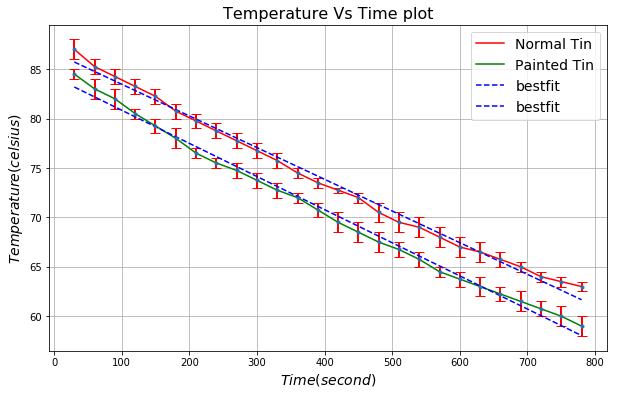

In [47]:

data = np.loadtxt("cond.csv",delimiter = ',')
#data = np.loadtxt("test4multiplot.txt", dtype = str)     #if file contains multiple data types
#data

x1 = data[:,0]
y1 = data[:,3]
y2 = data[:,6]
#print(x)
#print(y)
y1error = data[:,7]
y2error = data[:,8]
#plot data
plt.figure(figsize = [10,6])
plt.plot(x1,y1,"-", color = "red", label = "Normal Tin")
plt.plot(x1,y2,"-", color = "green", label = "Painted Tin")
plt.errorbar(x1,y1, yerr = y1error,ecolor = 'red', elinewidth =2,capsize =5, fmt = '.')
plt.errorbar(x1,y2, yerr = y2error,ecolor = 'red', elinewidth =2,capsize =5, fmt = '.')
m1 , b1 = np.polyfit(x1,y1,1)
m2 , b2 = np.polyfit(x1,y2,1)
print( m1)  # m = slpoe and b = intercept
print(b1)
print(m2)
print(b2)

plt.plot(x1,m1*x1+b1,"--", color = "blue", label= "bestfit")
plt.plot(x1,m2*x1+b2,"--", color = "blue", label= "bestfit")

plt.title("Temperature Vs Time plot", fontsize=16)
plt.xlabel('$Time(second)$', fontsize=14)
plt.ylabel('$ Temperature(celsius) $', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True) 
plt.savefig("cond.png")
# comment this if u do not need grid
plt.show()

In [56]:
from numpy import cov
from scipy.stats import pearsonr

In [57]:
covariance = cov(x1,y1)
print(covariance)
corr , _ = pearsonr(x1,y1)
print("Pearson correlation : %.3f" %corr)
# t test for the population correlation coeffient 


[[52650.         -1688.7       ]
 [-1688.7           54.51153846]]
Pearson correlation : -0.997


# High level of correlation(nearly equal to -1) i.e. greater than 0.5 and a negative correlation. 

In [58]:
# t-test for dependent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t
 
# function for calculating the t-test for two dependent samples
def dependent_ttest(x, y, alpha):
	# calculate means
	mean1, mean2 = mean(x), mean(y)
	# number of paired samples
	n = len(x)
	# sum squared difference between observations
	d1 = sum([(x[i]-y[i])**2 for i in range(n)])
	# sum difference between observations
	d2 = sum([x[i]-y[i] for i in range(n)])
	# standard deviation of the difference between means
	sd = sqrt((d1 - (d2**2 / n)) / (n - 1))
	# standard error of the difference between the means
	sed = sd / sqrt(n)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = n - 1
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 

# calculate the t test
alpha = 0.05
t_stat, df, cv, p = dependent_ttest(x1, y1, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=7.134, df=25, cv=1.708, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [59]:
# calculate the critical value
alpha = 0.05
cv = t.ppf(1.0 - alpha, df) 


In [60]:
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [ ]:
#np.cov(data)
# correlation between x and y
# t test
# result significance from p value

In [ ]:
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

In [ ]:
# https://github.com/dharmapaudel 